# **Titanic Survival Prediction - Codsoft Internship**

**Importing Essential Libraries**

In [2]:
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Import Dataset**

In [23]:
files.upload()
df = pd.read_csv('tested.csv')

Saving tested.csv to tested (1).csv


**Data Overview**

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.describe(include=object).T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Text(0.5, 0.98, 'Titanic Survival')

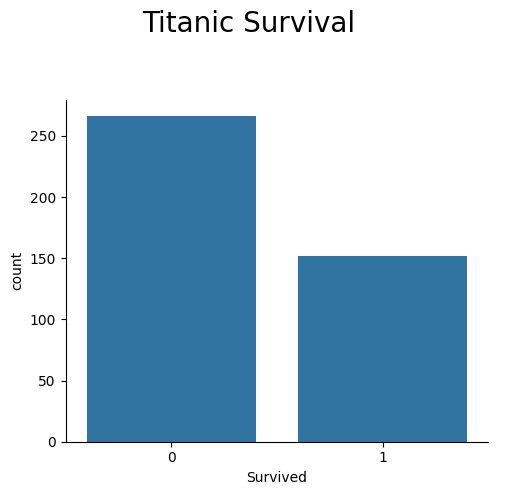

In [36]:
plot = sns.catplot(df, x="Survived", kind="count")
plot.figure.subplots_adjust(top=0.8);
plot.figure.suptitle("Titanic Survival",
                  fontsize=20, fontdict={"weight": "bold"})

**Dealing With Unnecessary Attributes**

In [8]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket'], inplace=True)

**Dealing With Null Values**

In [9]:
df.isnull().sum().sort_values(ascending=False)

Age         86
Fare         1
Survived     0
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(inplace=True)

**Dealing With Categorical Attributes**

In [11]:
encoder = LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])

**Relation Between Numerical Variables**

Text(0.5, 1.0, 'Relation Between Numerical Variables')

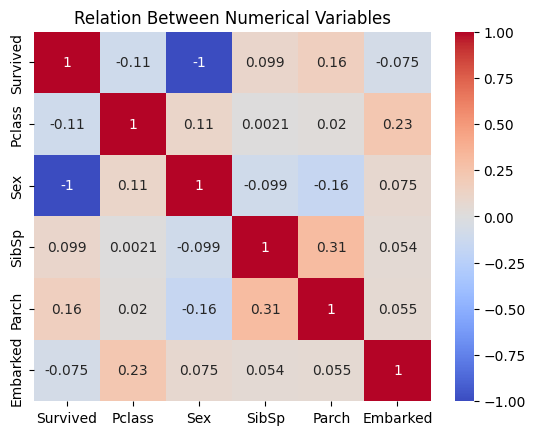

In [12]:
numerical = df.select_dtypes(include=['int64']).corr()
sns.heatmap(numerical, annot=True, cmap='coolwarm').set_title('Relation Between Numerical Variables')

**Splitting Dataset Into Training and Testing**

In [13]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Train Dataset**

In [14]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

**Model Evaluation**

In [15]:
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 100.0%
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

